In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from random import randrange
from scipy.stats import linregress
# Study data files
path = "../Resources/backloggd_games.csv"

# Read the mouse data and the study results
game_df = pd.read_csv(path)

# Display the data table for preview
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [2]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [3]:
game_df.Developers.nunique()

18356

In [4]:
game_df.Developers.value_counts()

Developers
[]                                        18091
['Konami']                                  470
['Nintendo']                                325
['Capcom']                                  318
['Sega']                                    185
                                          ...  
['NanoPiko Games', 'Plug In Digital']         1
['DevCubeStudio', 'Fibrum Limited']           1
['TeamFatBears']                              1
['Blueside', 'Microsoft Game Studios']        1
['Travian Games', 'Shadow Masters']           1
Name: count, Length: 18356, dtype: int64

In [5]:
game_df.Title.value_counts()

Title
Date A Live Twin Edition: Rio Reincarnation            24
Tube                                                   21
Yakiniku Bugyou                                        20
The Store is Closed                                    20
Nonogram Survival                                      19
                                                       ..
Spider-Man: Homecoming - Virtual Reality Experience     1
Hammerfight                                             1
Team USA Basketball                                     1
Syvalion                                                1
Orbit - Playing with Gravity                            1
Name: count, Length: 40985, dtype: int64

In [6]:
game_df.Title.nunique()

40985

In [7]:
game_df['Developers']=game_df['Developers'].str.split(',').str[0]
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",['FromSoftware',"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",['Nintendo',The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015",['tobyfox',"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [8]:
game_df["Developers"] = game_df["Developers"].astype(str)
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",['FromSoftware',"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",['Nintendo',The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015",['tobyfox',"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [9]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [10]:
game_df["Developers"] = game_df["Developers"].apply(lambda x: str(x).lstrip("['")) #TA Mike came up with this code
game_df["Developers"] = game_df["Developers"].apply(lambda x: str(x).rstrip("']"))
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",FromSoftware,"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Nintendo,The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",Team Cherry,A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015",tobyfox,"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [11]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [12]:
# Use a for loop to change to columns (Plays, Playing, Backlogs, Wishlist, Lists, and Reviews)
# Use an replace statement to any change any value with 'K' to a float, multiply that by 1,000, and then change the entire column to integers

cols = ('Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews')

for col in cols:
    # Apply a lambda function to replace 'K' and multiply by 1000 if 'K' is present
    game_df[col] = game_df[col].apply(lambda x: float(str(x).replace('K', '')) * 1000 if 'K' in str(x) else int(x))

game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",FromSoftware,"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Nintendo,The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0
2,2,Hades,"Dec 07, 2018",Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0
3,3,Hollow Knight,"Feb 24, 2017",Team Cherry,A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0
4,4,Undertale,"Sep 15, 2015",tobyfox,"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0


In [13]:
# Change Release_Date to datetime, had to adjust for TBD values so changed them to NaT (Not a Time) function

game_df['Release_Date'] = game_df['Release_Date'].str.replace('TBD', 'NaT')
game_df['Release_Date'] = pd.to_datetime(game_df['Release_Date'])

In [14]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    60000 non-null  int64         
 1   Title         60000 non-null  object        
 2   Release_Date  51981 non-null  datetime64[ns]
 3   Developers    60000 non-null  object        
 4   Summary       55046 non-null  object        
 5   Platforms     60000 non-null  object        
 6   Genres        60000 non-null  object        
 7   Rating        25405 non-null  float64       
 8   Plays         60000 non-null  float64       
 9   Playing       60000 non-null  float64       
 10  Backlogs      60000 non-null  float64       
 11  Wishlist      60000 non-null  float64       
 12  Lists         60000 non-null  float64       
 13  Reviews       60000 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(5)
memory usage: 6.4+ MB


In [15]:
game_df['Platforms'] = game_df['Platforms'].str.split(',')
game_df['Genres'] = game_df['Genres'].str.split(',')

In [16]:
# After converting those columns into a list, I could now continue with creating a code that can count the Platforms and Genres, then put them in new columns.
# I thought that maybe len(x) could work, it failed, then tried .apply len(x), which also failed.
# There was no specific function to accomplish what I needed, which reminded me of lambda, which I had previously looked up because the TA had given the group a lambda function before.
# After repeated trial and error I finally came up with the code below.
# ".apply" applies all the things in the () to the Platforms column. 
# "lambda x:" is used because "lambda", x, and colon, must be used in that order to start the lambda function.
# "len(x)" is used to count the x or elements within the cell.
platform_counts = game_df['Platforms'].apply(lambda x: len(x))
genre_counts = game_df['Genres'].apply(lambda x: len(x))

# Adding new columns for platform and genre counts through the use of brackets..
game_df['Platform_Count'] = platform_counts
game_df['Genre_Count'] = genre_counts

game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","[['Windows PC', 'PlayStation 4', 'Xbox One',...","[['Adventure', 'RPG']]",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"[['Wii U', 'Nintendo Switch']]","[['Adventure', 'Puzzle']]",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"[['Windows PC', 'Mac', 'PlayStation 4', 'Xb...","[['Adventure', 'Brawler', 'Indie', 'RPG']]",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"[['Windows PC', 'Mac', 'Linux', 'Nintendo S...","[['Adventure', 'Indie', 'Platform']]",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","[['Windows PC', 'Mac', 'Linux', 'PlayStatio...","[['Adventure', 'Indie', 'RPG', 'Turn Based ...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [17]:
# Now that the list was done, I need to convert back to a string so I could use str.replace (as was originally planned but would change) to get rid of the extra characters.
# I copied the code used for turning the developers column into a string and then altered it for Platforms and Genres.
game_df['Platforms'] = game_df['Platforms'].astype(str)
game_df['Genres'] = game_df['Genres'].astype(str)
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","[""['Windows PC'"", "" 'PlayStation 4'"", "" 'Xbox ...","[""['Adventure'"", "" 'RPG']""]",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"[""['Wii U'"", "" 'Nintendo Switch']""]","[""['Adventure'"", "" 'Puzzle']""]",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"[""['Windows PC'"", "" 'Mac'"", "" 'PlayStation 4'""...","[""['Adventure'"", "" 'Brawler'"", "" 'Indie'"", "" '...",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"[""['Windows PC'"", "" 'Mac'"", "" 'Linux'"", "" 'Nin...","[""['Adventure'"", "" 'Indie'"", "" 'Platform']""]",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","[""['Windows PC'"", "" 'Mac'"", "" 'Linux'"", "" 'Pla...","[""['Adventure'"", "" 'Indie'"", "" 'RPG'"", "" 'Turn...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [18]:
# Originally was 8 lines of code to remove the unwanted characters but after playing around a bit, I got it lowered to two.
game_df['Platforms'] = game_df['Platforms'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
game_df['Genres'] = game_df['Genres'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Brawler, Indie, RPG",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","Adventure, Indie, Platform",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbo...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [19]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      60000 non-null  int64         
 1   Title           60000 non-null  object        
 2   Release_Date    51981 non-null  datetime64[ns]
 3   Developers      60000 non-null  object        
 4   Summary         55046 non-null  object        
 5   Platforms       60000 non-null  object        
 6   Genres          60000 non-null  object        
 7   Rating          25405 non-null  float64       
 8   Plays           60000 non-null  float64       
 9   Playing         60000 non-null  float64       
 10  Backlogs        60000 non-null  float64       
 11  Wishlist        60000 non-null  float64       
 12  Lists           60000 non-null  float64       
 13  Reviews         60000 non-null  float64       
 14  Platform_Count  60000 non-null  int64         
 15  Ge

In [20]:
# Add next three cells to data cleaning area

In [21]:
# Color Codes for seaborn palette
colors = ['#007F5F', '#2B9348', '#55A630', '#80B918', '#AACC00', '#BFD200', '#D4D700', '#DDDF00', '#EEEF20', '#FFFF3F']

# Set custom palette name in seaborn charts
customPalette = sns.set_palette(sns.color_palette(colors))

# Copy Code for seaborn charts
# palette=customPalette

In [22]:
# Developer Summary Leaderboard

over_100_reviews =game_df[game_df['Reviews'] >= 100]

dev_avg_rating = over_100_reviews.groupby('Developers')['Rating'].mean()
dev_avg_playing = over_100_reviews.groupby('Developers')['Playing'].mean()
dev_sum_title = over_100_reviews.groupby('Developers')['Title'].count()
dev_sum_plays = over_100_reviews.groupby('Developers')['Plays'].sum()

dev_summary_data = {
    "Number of Titles by Dev": dev_sum_title,
    "Average Rating by Dev": dev_avg_rating,
    "Average Number Playing by Dev": dev_avg_playing,
    "Total Number of Plays by Dev": dev_sum_plays    
}

dev_summary_data = pd.DataFrame(dev_summary_data)
dev_summary_data.sort_values(by="Total Number of Plays by Dev", ascending=False).head(20)

,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
Developers,,,,
Nintendo,152,3.668421,220.565789,1002094.0
Capcom,62,3.796774,200.112903,317581.0
Square Enix,51,3.652941,226.803922,214397.0
Electronic Arts,24,3.520833,193.583333,188800.0
Nintendo EAD,18,3.744444,150.500000,179100.0
Sony Computer Entertainment,30,3.676667,57.533333,154399.0
Konami,25,3.624000,154.360000,148630.0
Sega,37,3.362162,145.054054,134725.0
Naughty Dog,13,3.961538,129.000000,124500.0


In [23]:
# First section = What are the top 10 developers by plays

C:\Users\nb51\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


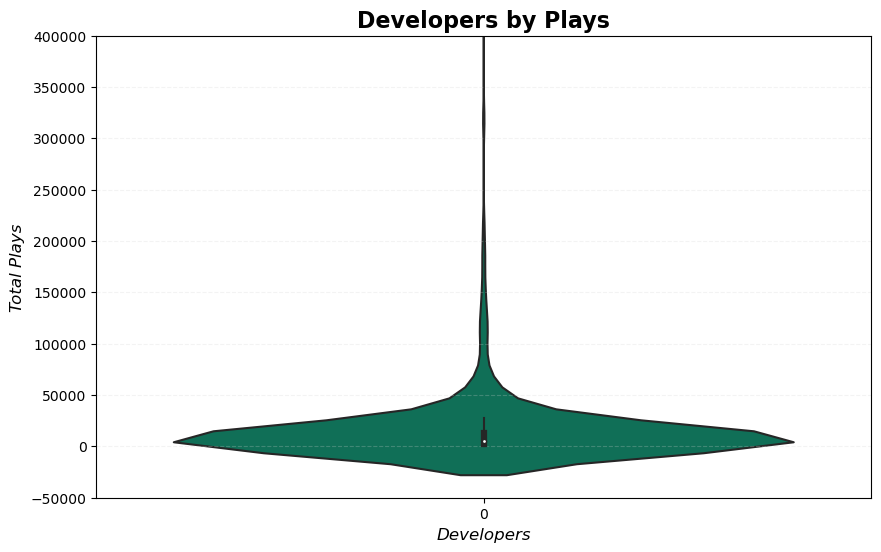

In [24]:
# Basic Violinplot
# https://seaborn.pydata.org/examples/wide_form_violinplot.html

df = dev_sum_plays

# create the plot
plt.figure(figsize=(10,6))
sns.violinplot(data=df)

# customizations
plt.xlabel("Developers", fontstyle="italic", fontsize=12)
plt.ylabel("Total Plays", fontstyle="italic", fontsize=12)
plt.title("Developers by Plays", fontsize=16, fontweight="bold")
plt.ylim(-50000, 400000)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

In [25]:
# Developer Summary Leaderboard

over_100_reviews =game_df[game_df['Reviews'] >= 100]

dev_avg_rating = over_100_reviews.groupby('Developers')['Rating'].mean()
dev_avg_playing = over_100_reviews.groupby('Developers')['Playing'].mean()
dev_sum_title = over_100_reviews.groupby('Developers')['Title'].count()
dev_sum_plays = over_100_reviews.groupby('Developers')['Plays'].sum()

dev_summary_data = {
    "Number of Titles by Dev": dev_sum_title,
    "Average Rating by Dev": dev_avg_rating,
    "Average Number Playing by Dev": dev_avg_playing,
    "Total Number of Plays by Dev": dev_sum_plays    
}

dev_summary_data = pd.DataFrame(dev_summary_data)
dev_summary_data.sort_values(by="Average Rating by Dev", ascending=False).head(20)

,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
Developers,,,,
ZA/UM,2,4.600000,930.500000,12100.0
Mobius Digital,2,4.550000,435.500000,11000.0
Konami Computer Entertainment Japan,3,4.533333,86.666667,16900.0
Capcom Development Division 1,1,4.500000,83.000000,1300.0
Konami Digital Entertainment,2,4.500000,39.000000,4600.0
Team Cherry,2,4.450000,1520.500000,29700.0
Dramatic Create,1,4.400000,252.000000,1900.0
Buena Vista Games,2,4.400000,123.000000,15800.0
Tour De Pizza,1,4.400000,428.000000,2200.0


In [26]:
# Second section = What are the top 100 developers by rating

<Figure size 1000x600 with 0 Axes>

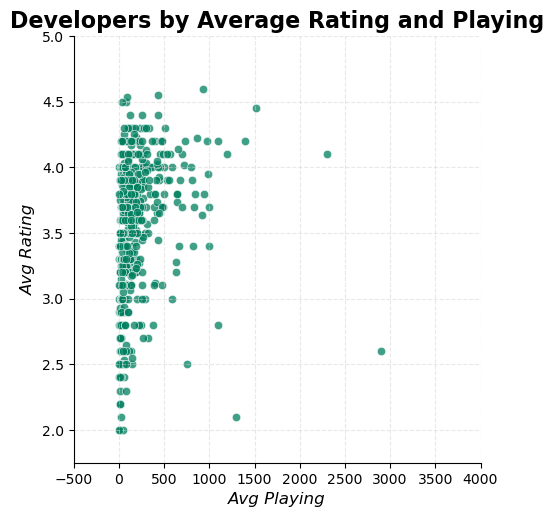

In [27]:
# Basic Scatter
# https://seaborn.pydata.org/examples/scatter_bubbles.html

custompalette = sns.set_palette(sns.color_palette(colors))
x = dev_avg_playing
y = dev_avg_rating

# create the plot
plt.figure(figsize=(10,6))
sns.relplot(x=x, y=y, alpha=.75)

# customizations
plt.xlabel("Avg Playing", fontstyle="italic", fontsize=12)
plt.ylabel("Avg Rating", fontstyle="italic", fontsize=12)
plt.title("Developers by Average Rating and Playing", fontsize=16, fontweight="bold")
plt.xlim(-500, 4000)
plt.ylim(1.75, 5)

plt.grid(color="lightgrey", axis="x", linestyle="--", alpha=0.5)
plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.5)

# show
plt.show()

In [28]:
# Developer Summary Leaderboard

over_100_reviews =game_df[game_df['Reviews'] >= 100]

dev_avg_rating = over_100_reviews.groupby('Developers')['Rating'].mean()
dev_avg_playing = over_100_reviews.groupby('Developers')['Playing'].mean()
dev_sum_title = over_100_reviews.groupby('Developers')['Title'].count()
dev_sum_plays = over_100_reviews.groupby('Developers')['Plays'].sum()

dev_summary_data = {
    "Number of Titles by Dev": dev_sum_title,
    "Average Rating by Dev": dev_avg_rating,
    "Average Number Playing by Dev": dev_avg_playing,
    "Total Number of Plays by Dev": dev_sum_plays    
}

dev_summary_data = pd.DataFrame(dev_summary_data)
dev_summary_data.sort_values(by="Total Number of Plays by Dev", ascending=False).head(20)

,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
Developers,,,,
Nintendo,152,3.668421,220.565789,1002094.0
Capcom,62,3.796774,200.112903,317581.0
Square Enix,51,3.652941,226.803922,214397.0
Electronic Arts,24,3.520833,193.583333,188800.0
Nintendo EAD,18,3.744444,150.500000,179100.0
Sony Computer Entertainment,30,3.676667,57.533333,154399.0
Konami,25,3.624000,154.360000,148630.0
Sega,37,3.362162,145.054054,134725.0
Naughty Dog,13,3.961538,129.000000,124500.0


In [29]:
# Third section = What are the top 10 developers by Count of Titles and Plays

In [52]:
mask = dev_summary_data.reset_index('Developers')
mask = dev_summary_data.sort_values('Total Number of Plays by Dev', ascending=False)
mask2 = mask.head(20)
mask2.head()

,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
Developers,,,,
Nintendo,152,3.668421,220.565789,1002094.0
Capcom,62,3.796774,200.112903,317581.0
Square Enix,51,3.652941,226.803922,214397.0
Electronic Arts,24,3.520833,193.583333,188800.0
Nintendo EAD,18,3.744444,150.500000,179100.0


In [58]:
# Basic Bars
# https://seaborn.pydata.org/examples/part_whole_bars.html


# Dataset
df = mask2

sns.barplot(x='Developers', y=dev_sum_plays, data=df)

# customizations
plt.xlabel("Developers", fontstyle="italic", fontsize=12)
plt.ylabel("Total Plays by Dev", fontstyle="italic", fontsize=12)
plt.title("Double Bar", fontsize=16, fontweight="bold")
plt.ylim(0, 1100000)
plt.xticks(rotation=90)


plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

ValueError: Could not interpret input 'Developers'

In [ ]:
# Basic Bars
# https://seaborn.pydata.org/examples/part_whole_bars.html

f, ax = plt.subplots(figsize=(5, 5))

total_titles_by_dev = top_dev_by_title_count.sort_values('Count of Titles', ascending=False)

sns.barplot(x='Developers', y='Plays', data=top_dev_by_plays_sum)


sns.barplot(x='Developers', y='Count of Titles', data=total_titles_by_dev)
plt.xticks(rotation=90)

